# Matplotlib Tutorial
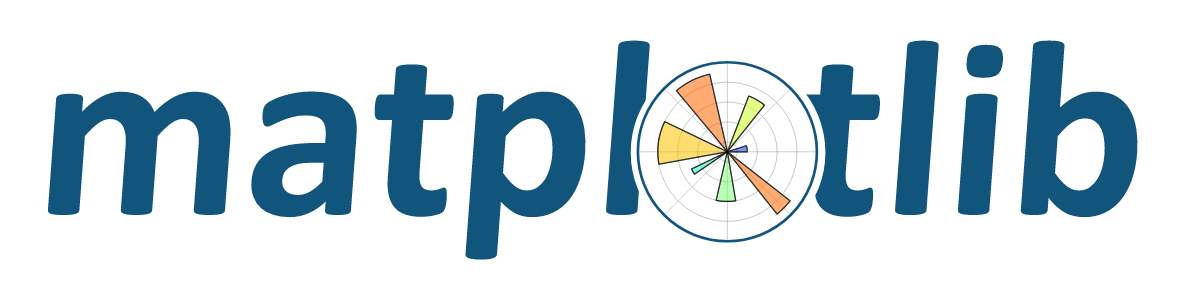

## Introduction

Matplotlib is the "grandfather" library of data visualization with Python. It was created to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, please explore the official Matplotlib web page: http://matplotlib.org/ for a few minutes.
    
In recent years, however, the interface and style of Matplotlib have begun to show their age. Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned. Still, people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in Visualization With Seaborn), ggpy, HoloViews, Altair, and even Pandas itself can be used as wrappers around Matplotlib's API. Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output. For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

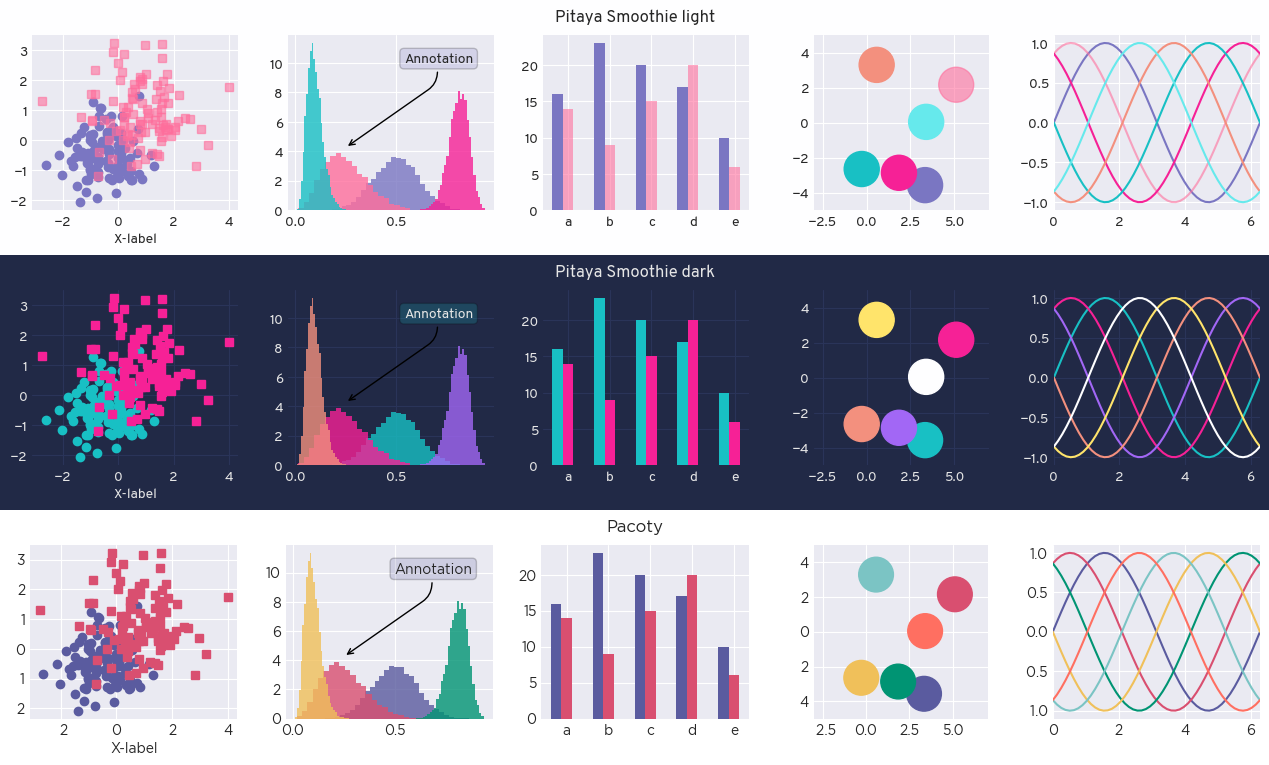

## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way). The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.:

In [2]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [3]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor such as PyCharm, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example

Let's walk through a very simple example using two numpy arrays:

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

In [4]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [5]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [6]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

We can create a very simple line plot using the following.

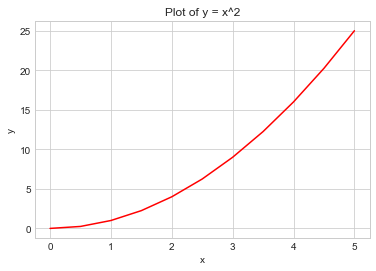

In [8]:
## A few different styling options
#plt.style.use('classic')
plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')

plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.show()

### Checkpoint: Create a plot of y = log(x) using the ggplot style and with x values ranging from 0.1 to 1000 at x-intervals of 0.1. Make the line green and label the graph and axes appropriately.

## Creating Multiplots on Same Canvas

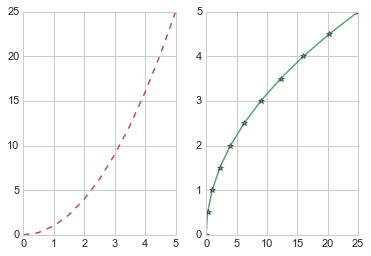

In [718]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

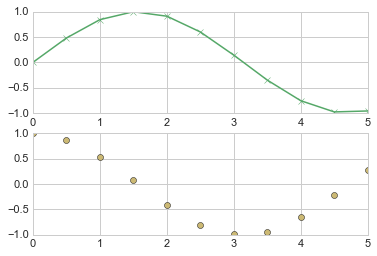

In [719]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x), 'gx-')

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x), 'yo');

### Checkpoint: Create a multiplot on the same canvas of y = x^2 - 3x + 5 and y = e^x. Use lines for both and a domain of -5 to 5.

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Title')

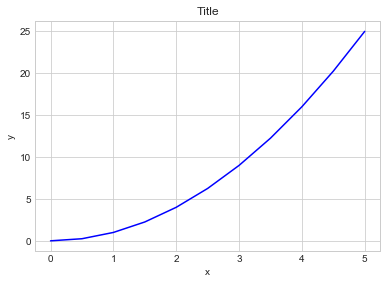

In [18]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('x') # Notice the use of set_ to begin methods
axes.set_ylabel('y')
axes.set_title('Title')

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

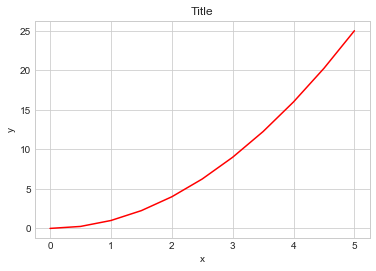

In [19]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title');

Then you can specify the number of rows and columns when creating the subplots() object:

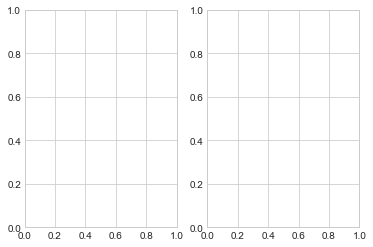

In [21]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [724]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ecfa4bb70>,
      dtype=object)

We can iterate through this array:

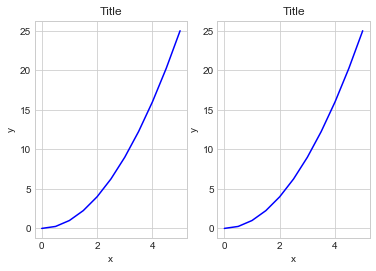

In [22]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

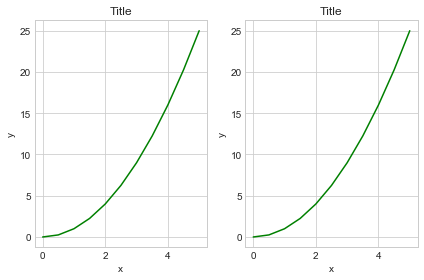

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Title')

fig    
plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [727]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

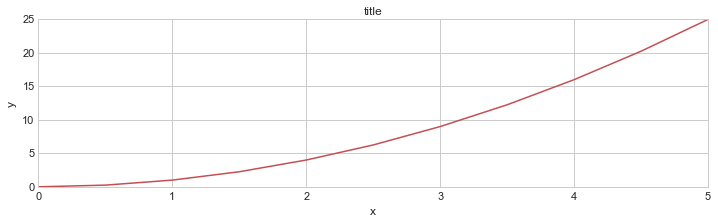

In [728]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [729]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [730]:
fig.savefig("filename.png", dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [731]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [732]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

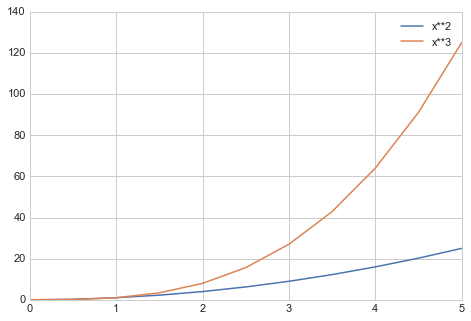

In [733]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details.

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

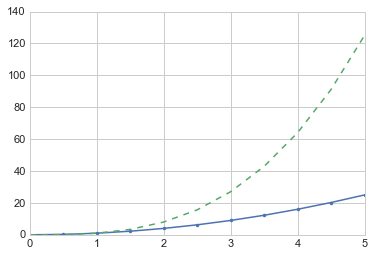

In [735]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

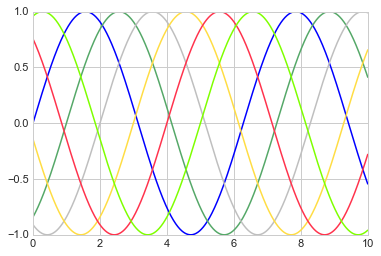

In [737]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

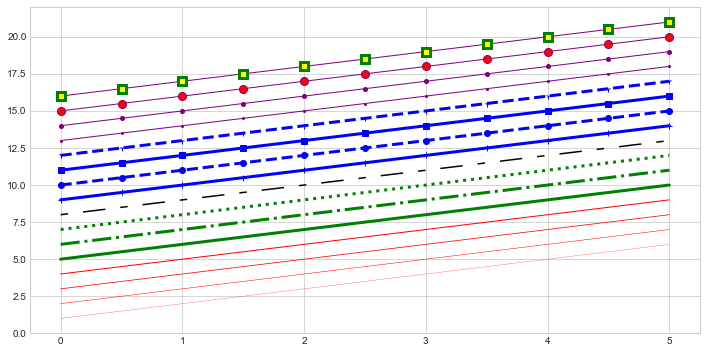

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=0.75)
ax.plot(x, x+4, color="red", linewidth=1.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

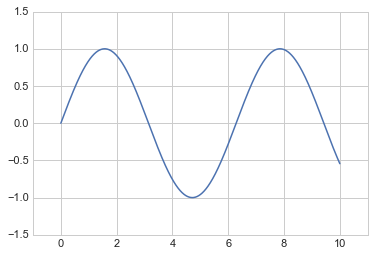

In [739]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

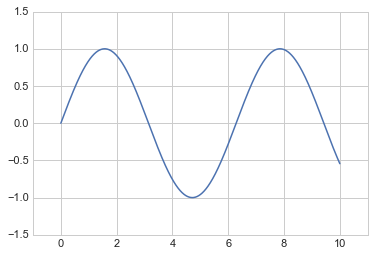

In [740]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

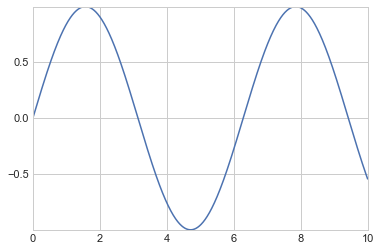

In [741]:
plt.plot(x, np.sin(x))
plt.axis('tight');

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

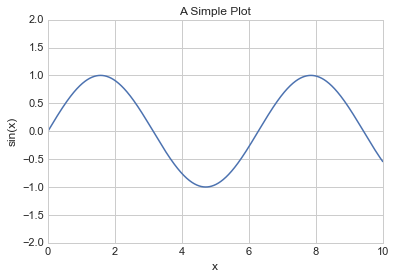

In [742]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

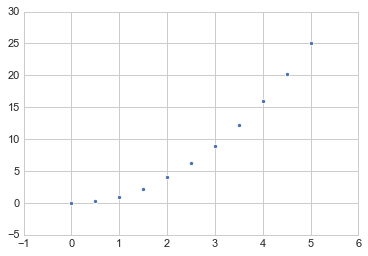

In [743]:
x = np.linspace(0, 5, 11)
y = x ** 2
plt.scatter(x,y)

(array([10., 16.,  5.,  9.,  6.,  5., 11., 15., 13., 10.]),
 array([  9. , 107.9, 206.8, 305.7, 404.6, 503.5, 602.4, 701.3, 800.2,
        899.1, 998. ]),
 <a list of 10 Patch objects>)

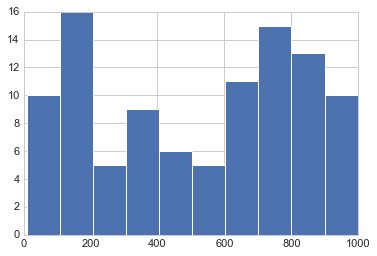

In [744]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

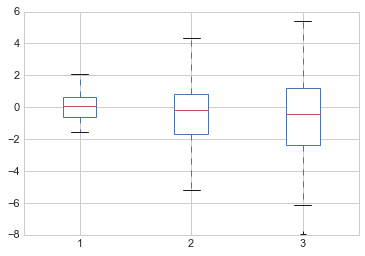

In [745]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) | [Contents](Index.ipynb) | [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.06-Customizing-Legends.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

In [746]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [747]:
%matplotlib inline
import numpy as np

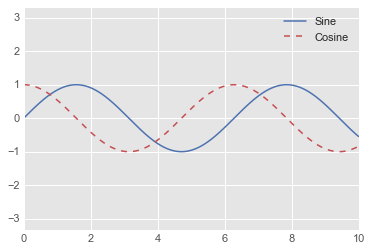

In [748]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

For more information on available legend options, see the ``plt.legend`` docstring.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

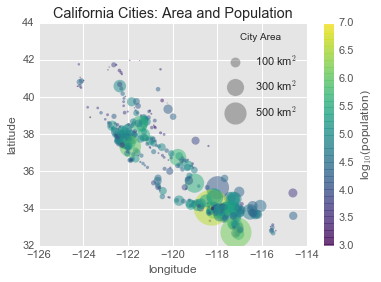

In [754]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

Finally, note that for geographic data like this, it would be clearer if we could show state boundaries or other map-specific elements.
For this, an excellent choice of tool is Matplotlib's Basemap addon toolkit, which we'll explore in [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb).

# Customizing Colorbars

Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.
Because the book is printed in black-and-white, this section has an accompanying online supplement where you can view the figures in full color (https://github.com/jakevdp/PythonDataScienceHandbook).
We'll start by setting up the notebook for plotting and importing the functions we will use:

In [756]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [757]:
%matplotlib inline
import numpy as np

As we have seen several times throughout this section, the simplest colorbar can be created with the ``plt.colorbar`` function:

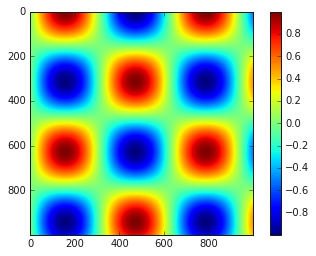

In [758]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

## Customizing Colorbars

The colormap can be specified using the ``cmap`` argument to the plotting function that is creating the visualization:

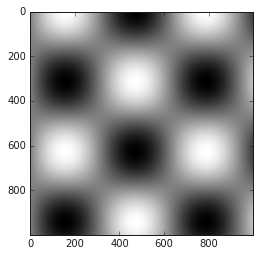

In [759]:
plt.imshow(I, cmap='gray');

All the available colormaps are in the ``plt.cm`` namespace; using IPython's tab-completion will give you a full list of built-in possibilities:
```
plt.cm.<TAB>
```
But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

In [770]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

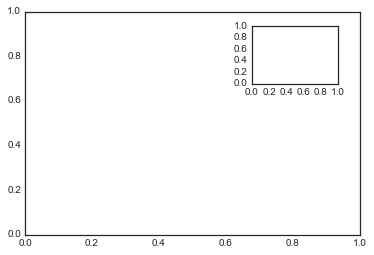

In [771]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

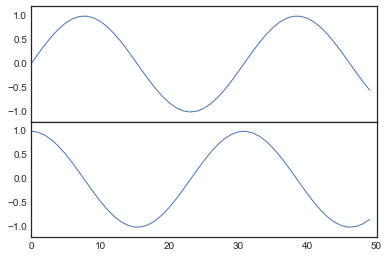

In [772]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

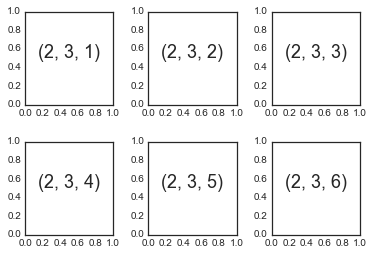

In [774]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

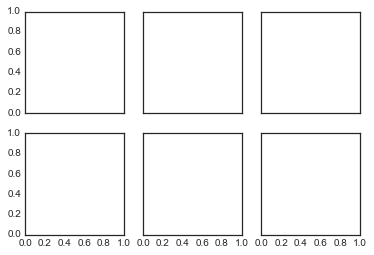

In [775]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

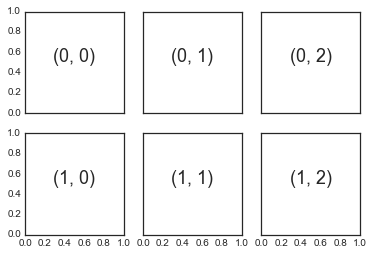

In [776]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

This type of distribution plotted alongside its margins is common enough that it has its own plotting API in the Seaborn package. We will see this in the next notebook.

# Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story.
In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.
Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.
Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and  importing the functions we will use:

In [780]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Example: Effect of Holidays on US Births

Let's return to some data we worked with earler, in ["Example: Birthrate Data"](03.09-Pivot-Tables.ipynb#Example:-Birthrate-Data), where we generated a plot of average births over the course of the calendar year; as already mentioned, that this data can be downloaded at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv.

We'll start with the same cleaning procedure we used there, and plot the results:

In [781]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

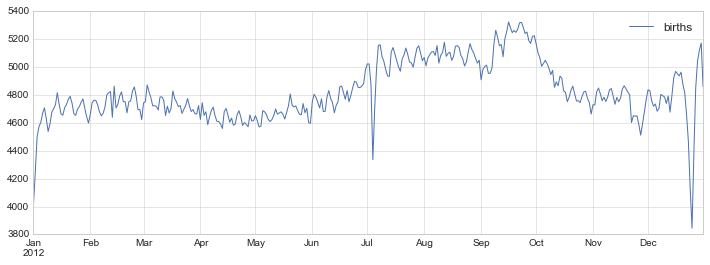

In [782]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention.
This can be done manually with the ``plt.text``/``ax.text`` command, which will place text at a particular x/y value:

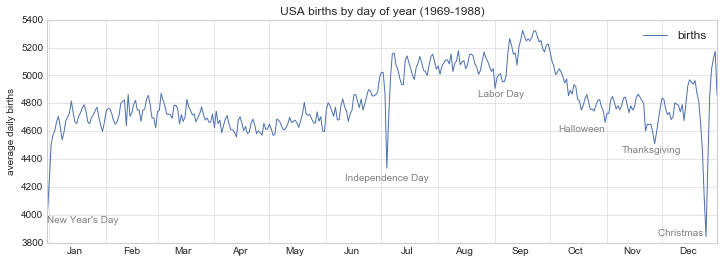

In [783]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The ``ax.text`` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
Here we used ``ha='right'`` and ``ha='center'``, where ``ha`` is short for *horizonal alignment*.
See the docstring of ``plt.text()`` and of ``mpl.text.Text()`` for more information on available options.

## Arrows and Annotation

Along with tick marks and text, another useful annotation mark is the simple arrow.

Drawing arrows in Matplotlib is often much harder than you'd bargain for.
While there is a ``plt.arrow()`` function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended.
Instead, I'd suggest using the ``plt.annotate()`` function.
This function creates some text and an arrow, and the arrows can be very flexibly specified.

Here we'll use ``annotate`` with several of its options:

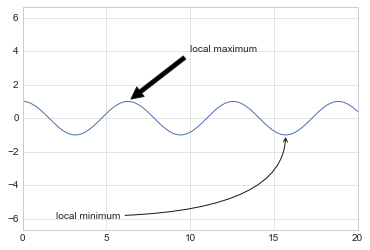

In [786]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

## Summary of Formatters and Locators

We've mentioned a couple of the available formatters and locators.
We'll conclude this section by briefly listing all the built-in locator and formatter options. For more information on any of these, refer to the docstrings or to the Matplotlib online documentaion.
Each of the following is available in the ``plt`` namespace:

Locator class        | Description
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Tick locations are fixed
``IndexLocator``     | Locator for index plots (e.g., where x = range(len(y)))
``LinearLocator``    | Evenly spaced ticks from min to max
``LogLocator``       | Logarithmically ticks from min to max
``MultipleLocator``  | Ticks and range are a multiple of base
``MaxNLocator``      | Finds up to a max number of ticks at nice locations
``AutoLocator``      | (Default.) MaxNLocator with simple defaults.
``AutoMinorLocator`` | Locator for minor ticks

Formatter Class       | Description
----------------------|---------------
``NullFormatter``     | No labels on the ticks
``IndexFormatter``    | Set the strings from a list of labels
``FixedFormatter``    | Set the strings manually for the labels
``FuncFormatter``     | User-defined function sets the labels
``FormatStrFormatter``| Use a format string for each value
``ScalarFormatter``   | (Default.) Formatter for scalar values
``LogFormatter``      | Default formatter for log axes

We'll see further examples of these through the remainder of the book.

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Customizing Ticks](04.10-Customizing-Ticks.ipynb) | [Contents](Index.ipynb) | [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.11-Settings-and-Stylesheets.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users.
While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

In [799]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

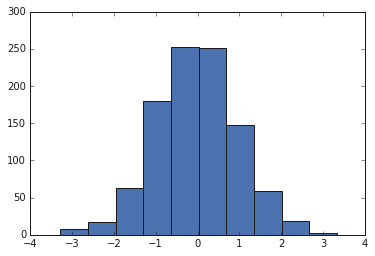

In [800]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

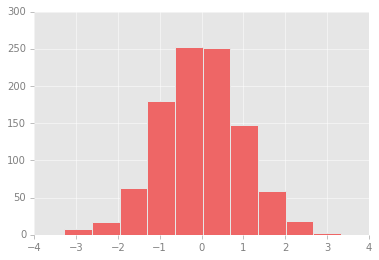

In [801]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by the look of the R language's ggplot visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: ``rcParams``

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

In [802]:
IPython_default = plt.rcParams.copy()

Now we can use the ``plt.rc`` function to change some of these settings:

In [803]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

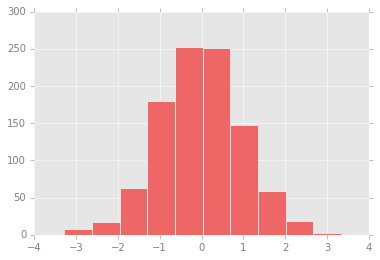

In [804]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters:

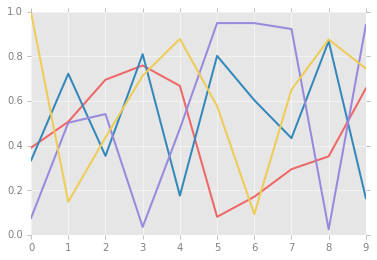

In [805]:
for i in range(4):
    plt.plot(np.random.rand(10))

I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
These settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).
That said, I prefer to customize Matplotlib using its stylesheets instead.

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient ``style`` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't create your own style, the stylesheets included by default are extremely useful.
The available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

In [806]:
plt.style.available[:5]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid']

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


Let's create a function that will make two basic types of plot:

In [807]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### FiveThiryEight style

The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see here, it is typified by bold colors, thick lines, and transparent axes:

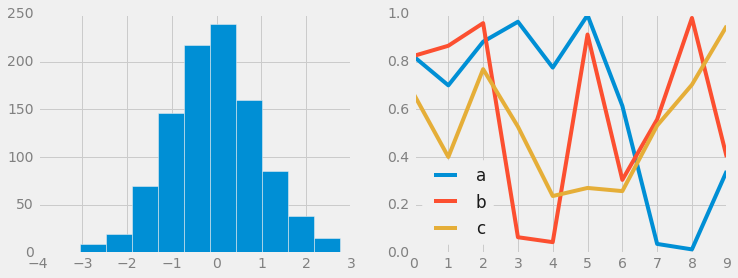

In [808]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The ``ggplot`` package in the R language is a very popular visualization tool.
Matplotlib's ``ggplot`` style mimics the default styles from that package:

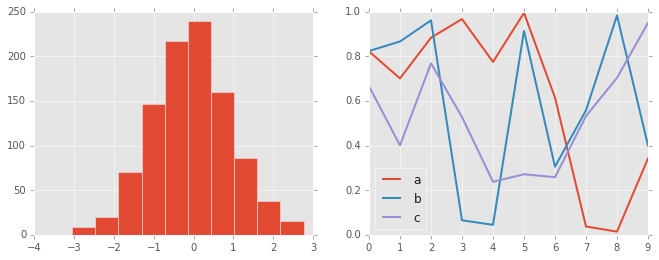

In [809]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

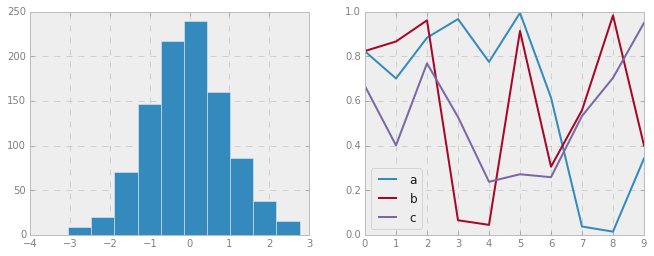

In [810]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

For figures used within presentations, it is often useful to have a dark rather than light background.
The ``dark_background`` style provides this:

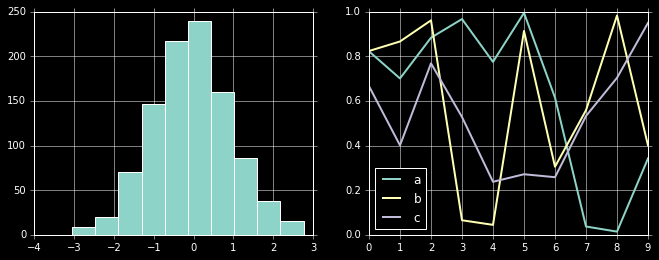

In [811]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the ``grayscale`` style, shown here, can be very useful:

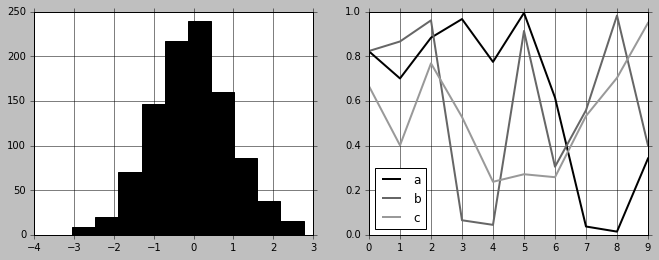

In [812]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

Matplotlib also has stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
As we will see, these styles are loaded automatically when Seaborn is imported into a notebook.
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

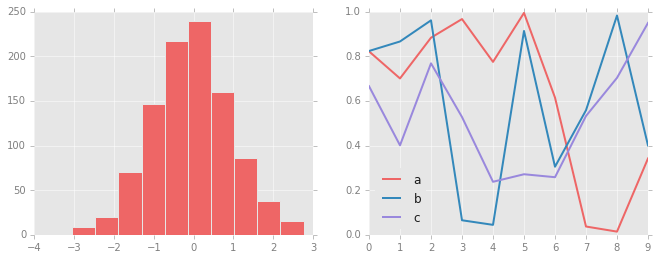

In [813]:
import seaborn
hist_and_lines()

With all of these built-in options for various plot styles, Matplotlib becomes much more useful for both interactive visualization and creation of figures for publication.
Throughout this book, I will generally use one or more of these style conventions when creating plots.

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [814]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

In [815]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

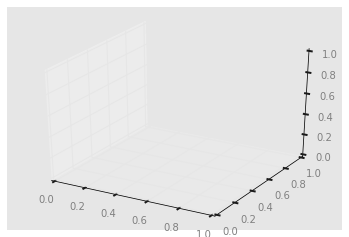

In [816]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code.

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

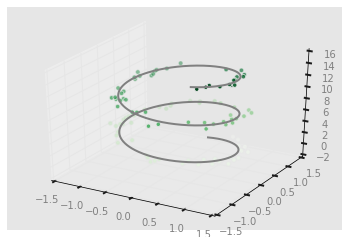

In [817]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.